<a href="https://colab.research.google.com/github/rcortezk9/tensorflow_lessons/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camer of a self-driving car recognizing the car in front.



## Get the data 

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the download file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-05-18 14:22:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.164.176, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   126MB/s    in 0.8s    

2021-05-18 14:22:36 (126 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine larning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
# !ls pizza_steak

In [3]:
# !ls pizza_steak/train

In [4]:
# !ls pizza_steak/train/steak/

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 May 18 14:22 .
drwxr-xr-x 1 root root 4096 May 18 14:22 ..
-rw-r--r-- 1 root root 6148 May 18 14:22 .DS_Store
drwxr-xr-x 4 root root 4096 May 18 14:22 test
drwxr-xr-x 4 root root 4096 May 18 14:22 train


In [7]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's ge the class names programmatically.

In [8]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectories
class_names = class_names[1:] # Index on list to remove .DS_Store.
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random 

def view_random_image(target_dir, target_class):
    # Set up the target directory (we'll view images form here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mping.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

['2467990.jpg']
Image shape: (512, 512, 3)


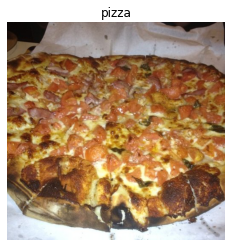

In [10]:
# View a random image form the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [11]:
# The images we've imported an plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 10,   6,   5],
        [ 10,   6,   5],
        [ 10,   6,   5],
        ...,
        [ 21,  13,  11],
        [ 16,  10,  10],
        [ 15,   9,   9]],

       [[ 10,   6,   5],
        [ 10,   6,   5],
        [ 10,   6,   5],
        ...,
        [ 20,  12,  10],
        [ 16,  10,  10],
        [ 17,  11,  11]],

       [[ 10,   6,   5],
        [ 10,   6,   5],
        [ 10,   6,   5],
        ...,
        [ 18,  10,   8],
        [ 16,  10,  10],
        [ 19,  13,  13]],

       ...,

       [[199, 206, 222],
        [200, 207, 223],
        [201, 208, 224],
        ...,
        [186, 185, 201],
        [186, 185, 201],
        [186, 185, 201]],

       [[201, 208, 224],
        [200, 207, 223],
        [200, 207, 223],
        ...,
        [184, 183, 199],
        [186, 185, 201],
        [187, 186, 202]],

       [[199, 206, 222],
        [197, 204, 220],
        [196, 203, 219],
        ...,
        [183, 182, 19

In [12]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

## An end-to-end example 

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images 
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 & 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                                seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              seed=42)

# Create a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 203ms/step - loss: 0.6377 - accuracy: 0.5922 - val_loss: 0.4405 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4312 - accuracy: 0.8002 - val_loss: 0.3463 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3530 - accuracy: 0.8474 - val_loss: 0.3742 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3704 - accuracy: 0.8393 - val_loss: 0.3096 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.3537 - accuracy: 0.8577 - val_loss: 0.2743 - val_accuracy: 0.8880


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun the cells above).

In [14]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

🛠 **Practice/exercise:** Go through the CNN explainer website for a minimum of 10-minutesa and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is form the TensorFlow playground.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate TensorFloe playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 176ms/step - loss: 2.1101 - accuracy: 0.5221 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6929 - accuracy: 0.5131 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6937 - accuracy: 0.4787 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6936 - accuracy: 0.4791 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5022 - val_loss: 0.6932 - val_accuracy: 0.5000


In [16]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x mor parameters than our CNN (model_1), model_2 performs terribly... let's try to make some improvements

In [17]:
# Set the seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 179ms/step - loss: 5.4564 - accuracy: 0.5758 - val_loss: 1.0433 - val_accuracy: 0.6380
Epoch 2/5
47/47 [==============================] - 8s 173ms/step - loss: 0.8054 - accuracy: 0.6981 - val_loss: 0.7011 - val_accuracy: 0.6520
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 1.1821 - accuracy: 0.6887 - val_loss: 0.6408 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5662 - accuracy: 0.7725 - val_loss: 0.4795 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 8s 174ms/step - loss: 0.5378 - accuracy: 0.7582 - val_loss: 0.6582 - val_accuracy: 0.6920


In [18]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. We here a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out the learn the most important paterns in a image**. So even though these are less learnable parateters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until statisfied (experiment, experiment, experiment)

### 1. Become with the data

['2154126.jpg']
Image shape: (512, 512, 3)
['670201.jpg']
Image shape: (512, 384, 3)


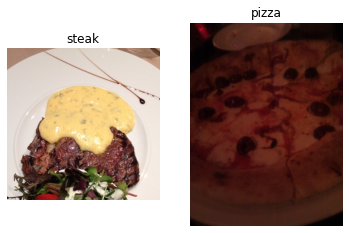

In [20]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

### 2. Preprocess the data

In [21]:
# Define directory dataset pats
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches.**

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because is good for your health.

In [22]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [23]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary', 
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary', 
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [24]:
# Get a sample of train data batch
images, labels = train_data.next() # get the 'next' batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [25]:
# How many batches are there
len(train_data)

47

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [27]:
images[7].shape

(224, 224, 3)

In [28]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is s relatively simple model or existing result that you setup when begining a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [29]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [30]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding='valid', # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

🛠 **Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/

In [31]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [32]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [33]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [34]:
# Fit the model 
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 1.5701 - accuracy: 0.6440 - val_loss: 0.4328 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4321 - accuracy: 0.8193 - val_loss: 0.3855 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.2617 - accuracy: 0.9054 - val_loss: 0.3790 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 9s 186ms/step - loss: 0.1128 - accuracy: 0.9723 - val_loss: 0.3839 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.0286 - accuracy: 0.9986 - val_loss: 0.4829 - val_accuracy: 0.8020


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

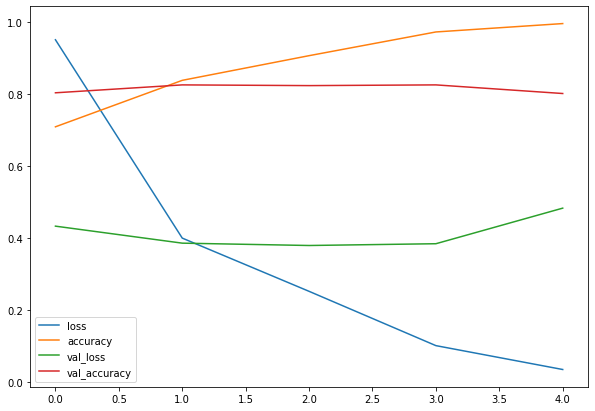

In [35]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [36]:
# Plot the vlaidation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

> 🔑 **Note:** When a model's **validation loss starts to increase, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the mode's ability to generalize to unseen dat will be diminished.

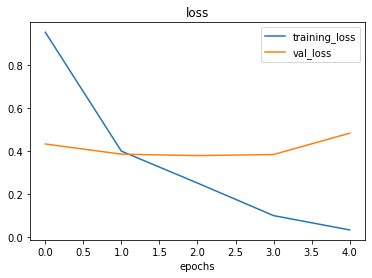

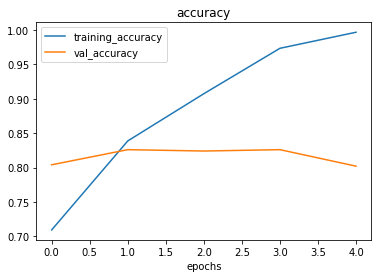

In [37]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing the overfitting is also known as **regularization**

In [38]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'), 
  MaxPool2D(), 
  Flatten(),
  Dense(1, activation='sigmoid')
])

In [39]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [40]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5, 
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6817 - accuracy: 0.5685 - val_loss: 0.4844 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 8s 180ms/step - loss: 0.5269 - accuracy: 0.7473 - val_loss: 0.3922 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.4480 - accuracy: 0.7846 - val_loss: 0.3808 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4084 - accuracy: 0.8246 - val_loss: 0.4472 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 8s 180ms/step - loss: 0.4191 - accuracy: 0.8190 - val_loss: 0.3300 - val_accuracy: 0.8700


In [41]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

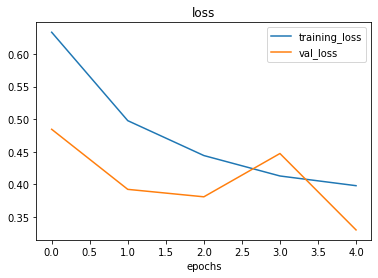

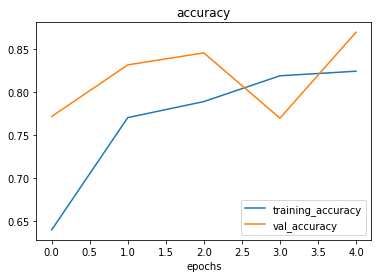

In [42]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [43]:
# Create ImageDataGenerator Training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image 
                                             width_shift_range=0.2, # move your image around on the x-axis
                                             height_shift_range=0.2, # mover your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip an image 

# Crate ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [44]:
# Import data and augment it form training directory
print('Augmented training data:')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 225),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False) # for demonstration purpose only
# Create non-augmented train data batches
print('Non-augmented training data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 225),
                                              batch_size=32,
                                              class_mode='binary',
                                              shuffle=False)  

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print('Non-augmented training data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode='binary')

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally... let's visualize some augmented data!!!

In [45]:
# Get sample augmented data batches
images, labels = train_data.next()
augmented_images, augented_labels = train_data_augmented.next() # Note: labels aren't augmented... only data (images)


Showing image number: 19


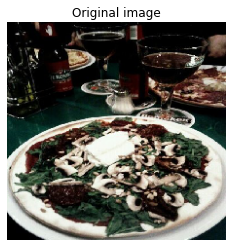

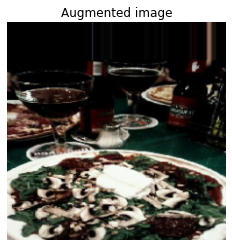

In [46]:
# Show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch sizes are 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [47]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augment data
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))



Epoch 1/5
47/47 [==============================] - 21s 434ms/step - loss: 0.7079 - accuracy: 0.4400 - val_loss: 0.6726 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 20s 426ms/step - loss: 0.6882 - accuracy: 0.5252 - val_loss: 0.6396 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 20s 422ms/step - loss: 0.6849 - accuracy: 0.5570 - val_loss: 0.6072 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 20s 425ms/step - loss: 0.6471 - accuracy: 0.6740 - val_loss: 0.5125 - val_accuracy: 0.7580
Epoch 5/5
47/47 [==============================] - 20s 423ms/step - loss: 0.7738 - accuracy: 0.6879 - val_loss: 0.6093 - val_accuracy: 0.7000


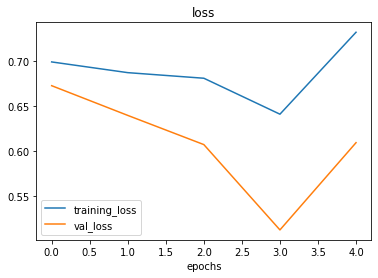

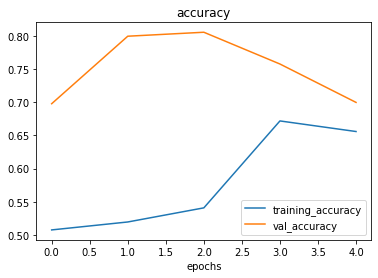

In [48]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [49]:
 train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                        target_size=(224, 224),
                                                                        class_mode='binary',
                                                                        batch_size=32,
                                                                        shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [50]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, 
                       epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 428ms/step - loss: 0.6627 - accuracy: 0.5735 - val_loss: 0.5306 - val_accuracy: 0.7320
Epoch 2/5
47/47 [==============================] - 20s 423ms/step - loss: 0.5523 - accuracy: 0.7141 - val_loss: 0.4110 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 20s 422ms/step - loss: 0.4905 - accuracy: 0.7551 - val_loss: 0.3539 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 20s 425ms/step - loss: 0.4436 - accuracy: 0.7914 - val_loss: 0.3456 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 20s 421ms/step - loss: 0.4567 - accuracy: 0.7891 - val_loss: 0.3116 - val_accuracy: 0.8740


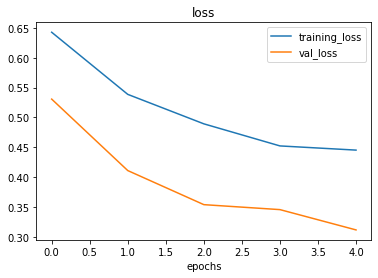

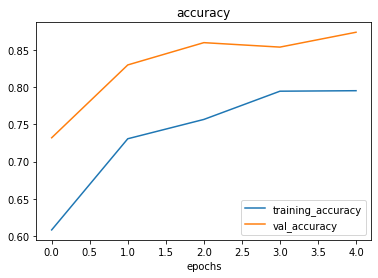

In [51]:
# Plot loss curves
plot_loss_curves(history_7)

> 🔑     **Note:** shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images(in our case, pizza & steak at the same time instead of just pizza then steak). 

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to imporve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunitites to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case.

> 🛠 **Practice:** Recreate the model on the CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [52]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2021-05-18 14:30:19--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2021-05-18 14:30:19 (47.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



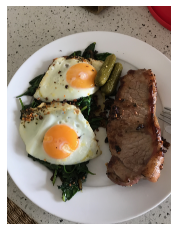

In [53]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mping.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [54]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

> 🔑 **Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important than your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [55]:
# Create a function to import an image and resize it to be able to bwe use with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image form filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [56]:
# Load in and preprocess our custom image
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [57]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

array([[0.88491625]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [58]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U9')

In [59]:
# We can index the precited lass by rounding the predictions probability and 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [60]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the precited class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Ge the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Predition: {pred_class}')
  plt.axis(False);

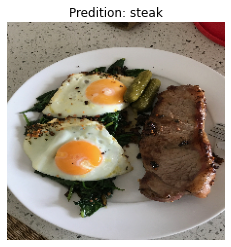

In [61]:
# Test our model on a custom image
pred_and_plot(model_7, '03-steak.jpeg')

Our model works! Let's try it on another image... this time pizza 🍕

--2021-05-18 14:30:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2021-05-18 14:30:21 (63.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



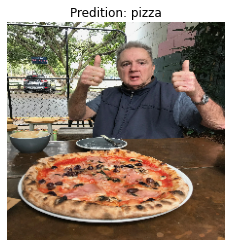

In [62]:
# Download another test custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, '03-pizza-dad.jpeg')

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), naow we're going to step things up a nothc with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and imporve the model (try to beat baseline/reduce overfittting)
7. Repeat until satisfied

## 1. Import and become one with the data

In [63]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip')
zip_ref.extractall()
zip_ref.close()

--2021-05-18 14:30:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.164.176, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   240MB/s    in 2.1s    

2021-05-18 14:30:24 (240 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [64]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

In [65]:
# Setup the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [66]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['272425.jpg']
Image shape: (512, 384, 3)


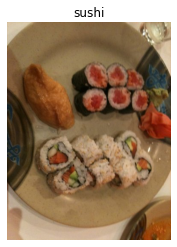

In [67]:
# Visualize...
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for the model)

In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create the model 
model_8 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 output and activation softmax
])

# Compile the model
model_8.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

In [70]:
history_8 = model_8.fit(train_data, # now 10 difference 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 45s 188ms/step - loss: 2.2661 - accuracy: 0.1399 - val_loss: 2.0698 - val_accuracy: 0.2420
Epoch 2/5
235/235 [==============================] - 44s 185ms/step - loss: 1.9609 - accuracy: 0.3115 - val_loss: 1.9323 - val_accuracy: 0.3084
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 1.2727 - accuracy: 0.5914 - val_loss: 2.2959 - val_accuracy: 0.2688
Epoch 4/5
235/235 [==============================] - 43s 184ms/step - loss: 0.2620 - accuracy: 0.9364 - val_loss: 3.7181 - val_accuracy: 0.2352
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.0260 - accuracy: 0.9976 - val_loss: 5.3465 - val_accuracy: 0.2404


### 5. Evaluate the model


In [71]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 10s 132ms/step - loss: 5.3465 - accuracy: 0.2404


[5.346519470214844, 0.24040000140666962]

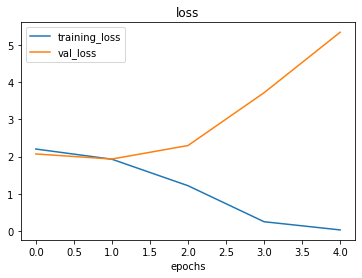

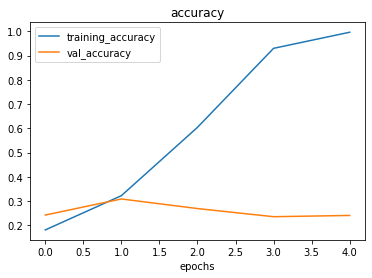

In [72]:
# Check out the model's loss curves of the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on th etest dataset.

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear out model is learning something...

However, it's not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify th model** - if our current model is overfitting the data, it may be too complicated of a model, one way to simplify a model is to: reduce the # of layers or reduce the # of hidden units in layers. 
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use thos patterns on your own data set

In [73]:
# How about we try and simplify the model first?
# Let's try to remove two convolut ional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])


In [74]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 179ms/step - loss: 2.9697 - accuracy: 0.1706 - val_loss: 1.9713 - val_accuracy: 0.2948
Epoch 2/5
235/235 [==============================] - 42s 179ms/step - loss: 1.8224 - accuracy: 0.3824 - val_loss: 1.9129 - val_accuracy: 0.3264
Epoch 3/5
235/235 [==============================] - 42s 178ms/step - loss: 1.4631 - accuracy: 0.5213 - val_loss: 1.9637 - val_accuracy: 0.3340
Epoch 4/5
235/235 [==============================] - 42s 179ms/step - loss: 1.0524 - accuracy: 0.6656 - val_loss: 2.2085 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 42s 179ms/step - loss: 0.6571 - accuracy: 0.8101 - val_loss: 2.5794 - val_accuracy: 0.3076


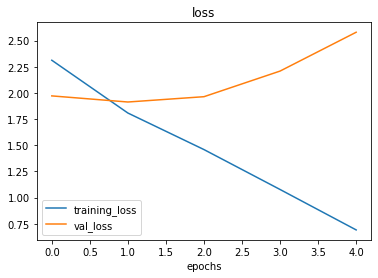

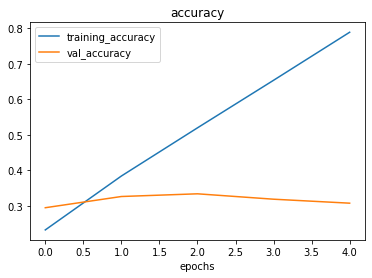

In [75]:
# Plot the loss curve for model_9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work...
* The accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [76]:
 # Create an augmented data generator instance
 train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)
 
 train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224, 224),
                                                                    batch_size=32,
                                                                    class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [77]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as pervious models)
model_10.compile(loss='categorical_crossentropy', 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

In [78]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 103s 436ms/step - loss: 2.3673 - accuracy: 0.1518 - val_loss: 2.0775 - val_accuracy: 0.2532
Epoch 2/5
235/235 [==============================] - 102s 435ms/step - loss: 2.1508 - accuracy: 0.2179 - val_loss: 2.0915 - val_accuracy: 0.2480
Epoch 3/5
235/235 [==============================] - 102s 435ms/step - loss: 2.0946 - accuracy: 0.2408 - val_loss: 1.9926 - val_accuracy: 0.3076
Epoch 4/5
235/235 [==============================] - 102s 435ms/step - loss: 2.0369 - accuracy: 0.2777 - val_loss: 1.8979 - val_accuracy: 0.3376
Epoch 5/5
235/235 [==============================] - 106s 449ms/step - loss: 1.9706 - accuracy: 0.3172 - val_loss: 1.9105 - val_accuracy: 0.3384


In [79]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 1.9105 - accuracy: 0.3384


[1.9104995727539062, 0.3384000062942505]

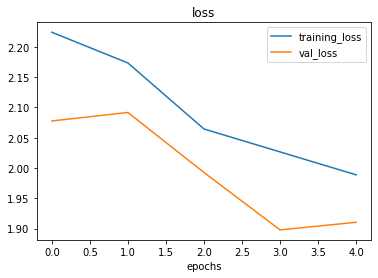

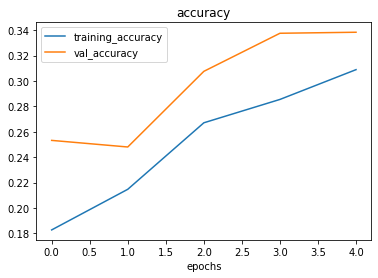

In [80]:
# Check out our modle trained on augmented data's loss curves
plot_loss_curves(history_10)

Woah! That looks much better, the loss curvers are much closer to each other than the baseline model and they look like they're heading in the right directions (certainly not the wrong direction) so if we were to train for longer, we might see further improvements. 

### 7. Repeat until satified

We could keep going here... continally trying to bring our loss curves closer together and trying to imporve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's archeitecture (increasing layers/hidden units)
- adjust the learning rate 
- try differnt methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochhs instead of 5 epochs
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [81]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-05-18 14:46:38--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2021-05-18 14:46:39 (53.2 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2021-05-18 14:46:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [82]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the precited class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f'Predition: {pred_class}')
  plt.axis(False);

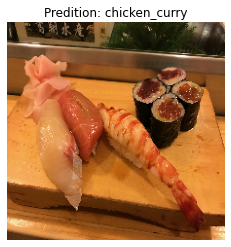

In [83]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename='03-sushi.jpeg',
              class_names=class_names)

Looks like our model didn't perform very well on our custom images but this is because it only achieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

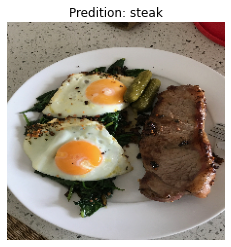

In [84]:
# Good news: our updated pred_and_plot function works fory binary classification too...
pred_and_plot(model=model_3,
              filename='03-steak.jpeg',
              class_names=['pizza', 'steak'])

## Saving and loading our model


In [85]:
# Save a model
model_10.save('saved_trained_model_10')

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [86]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 1.9105 - accuracy: 0.3384


[1.9104998111724854, 0.3384000062942505]

In [87]:
# Compare our loaded model to our existion model
model_10.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 1.9105 - accuracy: 0.3384


[1.9104998111724854, 0.3384000062942505]